
# Formations

You can plot formations (e.g. 4-4-2) on any mplsoccer pitch using the ``formation`` method.
The formations work is a collaboration between
[Dmitry Mogilevsky](https://twitter.com/ChicagoDmitry) and
[Andy Rowlinson](https://twitter.com/numberstorm).

The formations can be plotted as various options by using the ``kind`` argument:

* ``kind='scatter'``

* ``kind='image'``

* ``kind='axes'``

* ``kind='pitch'``

* ``kind='text'``


In [44]:
!pip install mplsoccer statsbombpy
from mplsoccer import VerticalPitch, Pitch, FontManager, Sbopen
import statsbombpy
from statsbombpy import sb


In [45]:
import math
from urllib.request import urlopen

import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import VerticalPitch, Sbopen, FontManager, inset_image

# data parser, fonts and path effects for giving the font an edge
parser = Sbopen()
roboto_bold = FontManager(
    'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

## Get Wyscout data
The next example uses some example
[Wyscout data](https://www.hudl.com/blog/wyscout-analysis-chelsea-vs-manchester-united).



In [46]:
wyscout_data = {'player_name': ['David de Gea', 'Bailly', 'Maguire', 'Shaw',
                                'Wan-Bissaka', 'Matić', 'Fred', 'Williams',
                                'Bruno Fernandes', 'James', 'Martial'],
                'position_id': ['gk', 'rcb3', 'cb', 'lcb3', 'rwb', 'rcmf', 'lcmf', 'lwb', 'amf',
                                'ss', 'cf'],
                }
WYSCOUT_FORMATION = '3-4-1-2'
df_wyscout = pd.DataFrame(wyscout_data)
df_wyscout

,player_name,position_id
0,David de Gea,gk
1,Bailly,rcb3
2,Maguire,cb
3,Shaw,lcb3
4,Wan-Bissaka,rwb
5,Matić,rcmf
6,Fred,lcmf
7,Williams,lwb
8,Bruno Fernandes,amf
9,James,ss


## Plotting Wyscout formations
Here we plot the '3-4-1-2' formation on a Wyscout pitch.
Note for some formations in the Wyscout data there are two attacking midfielders ('amf')
In mplsoccer, we have assigned the right position 'ramf' and the left position 'lamf'.
You may have to arbitrarily assign your 'amf' positions to these positions.



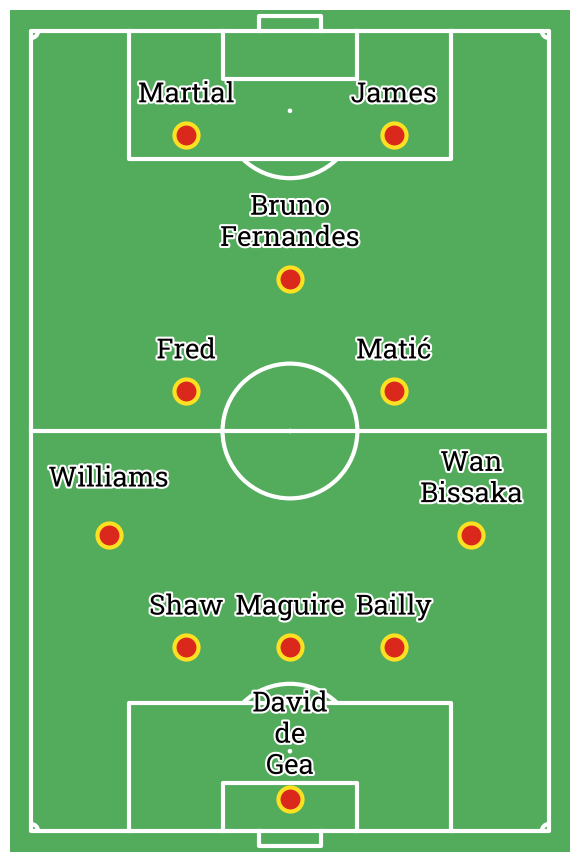

In [47]:
pitch = VerticalPitch(pitch_type='wyscout', goal_type='box', pitch_color='#53ac5c',
                      line_color='white', linewidth=3, corner_arcs=True)
fig, ax = pitch.draw(figsize=(6, 8.72))
sc_formation = pitch.formation(WYSCOUT_FORMATION, positions=wyscout_data['position_id'],
                               ax=ax, c='#DA291C', ec='#FBE122',
                               xoffset=[-6, -3, -3, -3, -5, -3, -3, -5, -5, -3, -3],
                               yoffset=[0, 0, 0, 0, -5, 0, 0, 5, 0, 0, 0],
                               lw=3, s=300)
sc_text = pitch.formation(WYSCOUT_FORMATION, positions=wyscout_data['position_id'],
                          text=df_wyscout['player_name'].str.replace(' ', '\n').str.replace('-',
                                                                                            '\n'),
                          yoffset=[0, 0, 0, 0, -5, 0, 0, 5, 0, 0, 0],
                          kind='text', va='center', ha='center', xoffset=2,
                          fontsize=20, fontproperties=roboto_bold.prop, path_effects=path_eff,
                          ax=ax)

In [48]:
pitch = VerticalPitch()
print(pitch.formations)

['442', '41212', '433', '451', '4411', '4141', '4231', '4321', '532', '541', '352', '343', '31312', '4222', '3511', '3421', '3412', '3142', '31213', '4132', '424', '4312', '3241', '3331', 'pyramid', 'metodo', 'wm', '41221', '42211', '32221', '5221', '3232', '312112', '42121', '31222', '4213', '32122', '41131', '432', '441', '4311', '4221', '4131', '4212', '342', '3411', '351', '531', '431', '44', '422', '341', '53']


In [49]:
pitch.formations_dataframe

,name,statsbomb,opta,wyscout,x,y,x_flip,y_flip,x_half,y_half,x_half_flip,y_half_flip,formation
0,GK,[1],1,gk,12.0,40.0,108.0,40.0,3.0,40.0,117.0,40.0,442
1,RB,[2],2,rb,31.2,70.0,88.8,10.0,13.2,70.0,106.8,10.0,442
2,RCB,[3],5,rcb,31.2,50.0,88.8,30.0,13.2,50.0,106.8,30.0,442
3,LCB,[5],6,lcb,31.2,30.0,88.8,50.0,13.2,30.0,106.8,50.0,442
4,LB,[6],3,lb,31.2,10.0,88.8,70.0,13.2,10.0,106.8,70.0,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,LCB,None,None,lcb3,31.2,24.0,88.8,56.0,13.2,24.0,106.8,56.0,53
5,LB,None,None,lb5,31.2,8.0,88.8,72.0,13.2,8.0,106.8,72.0,53
6,CDM,None,None,dmf,50.4,40.0,69.6,40.0,23.4,40.0,96.6,40.0,53
7,RCM,None,None,rcmf3,69.6,56.0,50.4,24.0,33.6,56.0,86.4,24.0,53


Available formations :
Below is a showcase of all available formations and their positions.

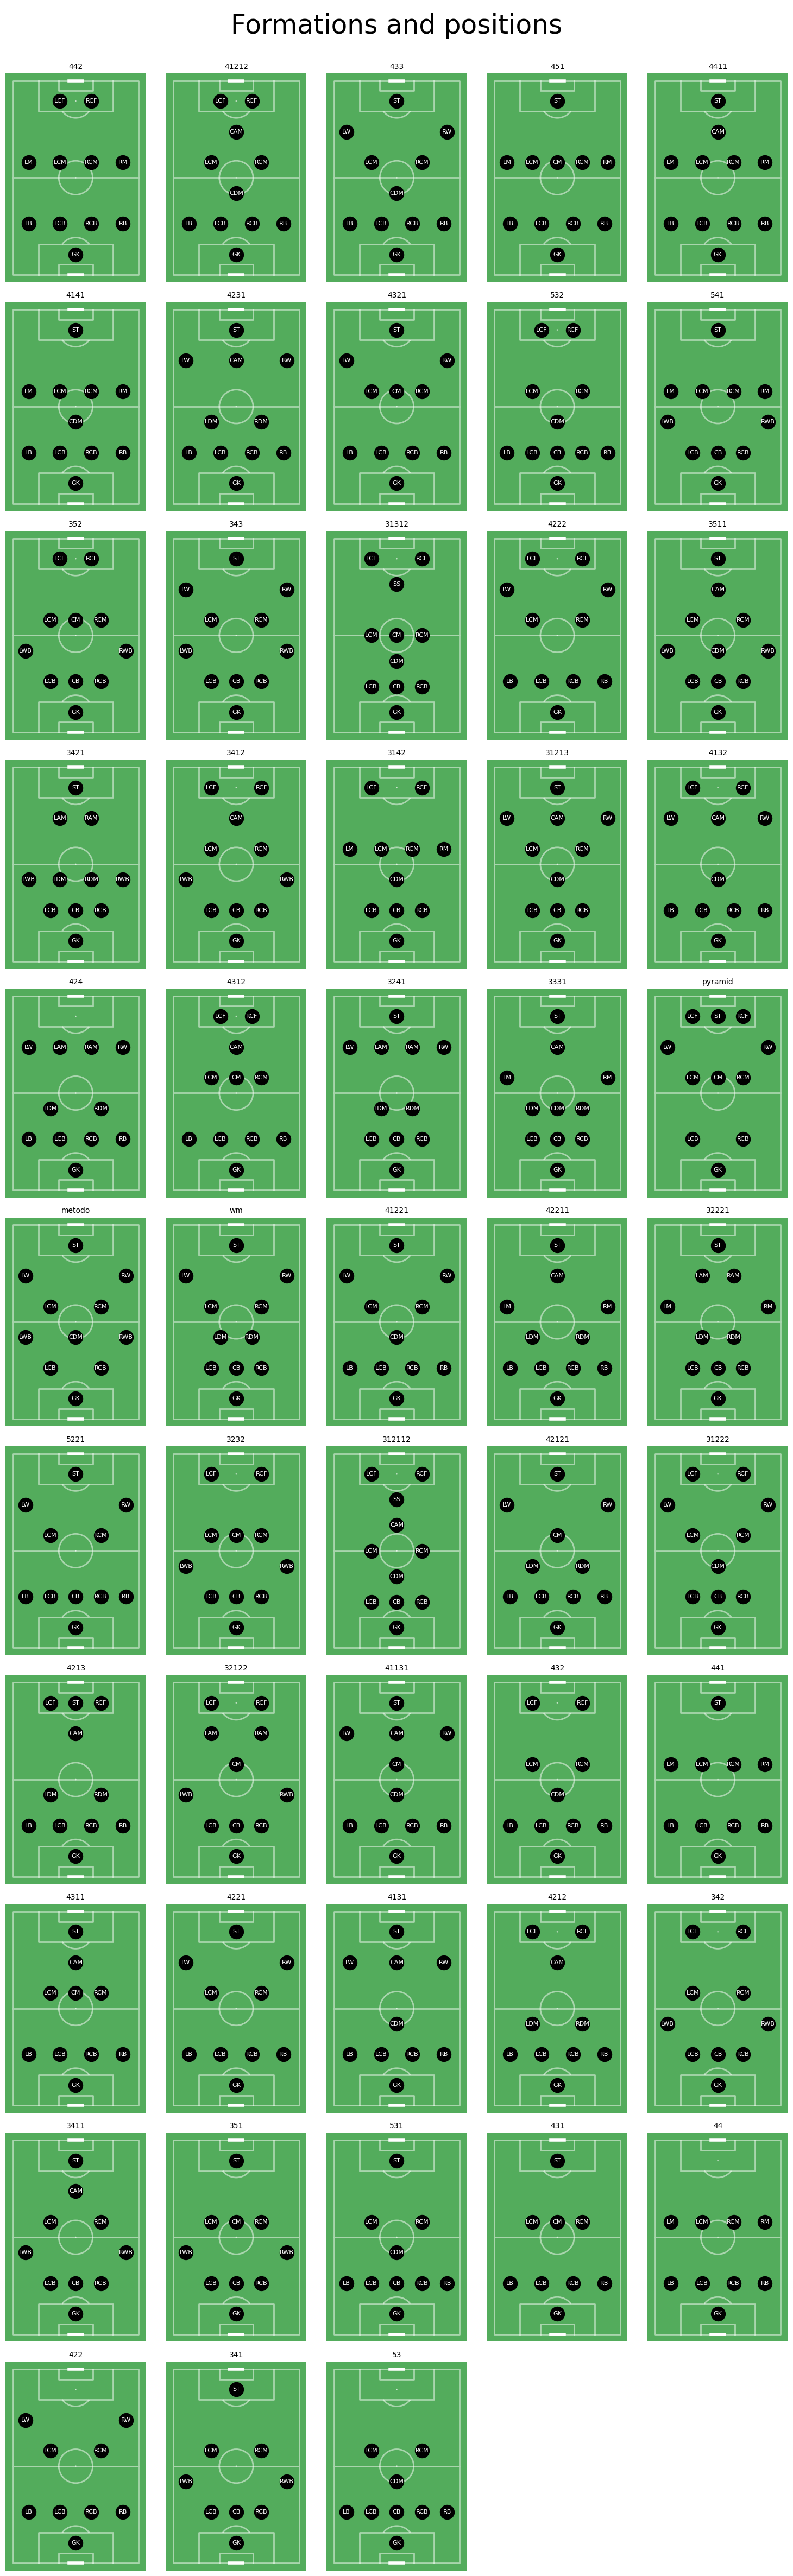

In [50]:
pitch = VerticalPitch('uefa', line_alpha=0.5, pitch_color='#53ac5c', line_color='white')

df_formations = pitch.formations_dataframe
COLS = 5
rows = math.ceil(len(pitch.formations) / COLS)

fig, axes = pitch.grid(nrows=rows, ncols=COLS, title_height=0.015, endnote_height=0, figheight=50,
                       space=0.08, grid_height=0.92)
axes_p = axes['pitch'].flatten()
for i, formation in enumerate(pitch.formations):
    pitch.formation(formation, kind='scatter', color='black', s=350, ax=axes_p[i])
    pitch.formation(formation, kind='text',
                    positions=df_formations.loc[df_formations.formation == formation, 'name'],
                    text=df_formations.loc[df_formations.formation == formation, 'name'],
                    color='white', fontsize=8, ha='center', va='center', ax=axes_p[i])
    axes_p[i].set_title(formation, fontsize=10)
axes['title'].axis('off')
title = axes['title'].text(0.5, 0.5, 'Formations and positions', fontsize=35,
                           ha='center', va='center')

# remove spare axes
number_spare_axes = (COLS * rows) - len(pitch.formations)
for j in range(1, number_spare_axes + 1):
    axes_p[-j].remove()

## Valid formations
You can print a list of the valid formations included in mplsoccer.
mplsoccer also accepts the hyphenated versions and the Wyscout formations
that include zeros, e.g. '4-4-2' and '5-3-0'.



In [51]:
Competitions = sb.competitions()
Competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [52]:
parser = Sbopen()
events, related, freeze, players = parser.event(3943043)
TEAM = 'Spain'
OPPONENT = 'versus England, 2024 EURO FINAL'


In [53]:
events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

In [54]:

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)


In [55]:

sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

In [56]:
# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [57]:
formation = events.groupby('team_name').tactics_formation.unique()
formation

,tactics_formation
team_name,
England,"[4231, 41212]"
Spain,[4231]


In [58]:
Formation = '4-2-3-1'
df_wyscout = pd.DataFrame(wyscout_data)
df_wyscout

,player_name,position_id
0,David de Gea,gk
1,Bailly,rcb3
2,Maguire,cb
3,Shaw,lcb3
4,Wan-Bissaka,rwb
5,Matić,rcmf
6,Fred,lcmf
7,Williams,lwb
8,Bruno Fernandes,amf
9,James,ss


In [59]:
parser = Sbopen()
event, related, freeze, tactics = parser.event(3943043)
# starting players from Barcelona
starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                               (event['team_name'] == 'Spain')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
# replace player names with the shorter version
player_short_names= {
    'Mikel Merino Zazón': 'Mikel Merino',
    'José Luis Sanmartín Mato': 'Joselu',
    'Álvaro Borja Morata Martín': 'Álvaro Morata',
    'David Raya Martin': 'David Raya',
    'Aymeric Laporte': 'Laporte',
    'José Ignacio Fernández Iglesias': 'Nacho',
    'Daniel Carvajal Ramos': 'Dani Carvajal',
    'Fabián Ruiz Peña': 'Fabián Ruiz',
    'Mikel Oyarzabal Ugarte': 'Mikel Oyarzabal',
    'Ferrán Torres García': 'Ferrán Torres',
    'Rodrigo Hernández Cascante': 'Rodri',
    'Jesús Navas González': 'Jesús Navas',
    'Alejandro Grimaldo García': 'Álex Grimaldo',
    'Unai Simón Mendibil': 'Unai Simón',
    'Daniel Olmo Carvajal': 'Dani Olmo',
    'Marc Cucurella Saseta': 'Marc Cucurella',
    'Robin Aime Robert Le Normand': 'Robin Le Normand',
    'Martín Zubimendi Ibáñez': 'Martín Zubimendi',
    'Alejandro Remiro Gargallo': 'Álex Remiro',
    'Alejandro Baena Rodríguez': 'Álex Baena',
    'Daniel Vivian Moreno': 'Dani Vivian',
    'Nicholas Williams Arthuer': 'Nico Williams',
    'Fermin Lopez Marin': 'Fermín López',
    'Lamine Yamal Nasraoui Ebana': 'Lamine Yamal'
}
starting_xi['player_name'] = starting_xi['player_name'].replace(player_short_names)
# filter only succesful ball receipts from the starting XI
event = event.loc[((event['type_name'] == 'Ball Receipt') &
                   (event['outcome_name'].isnull()) &
                   (event['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

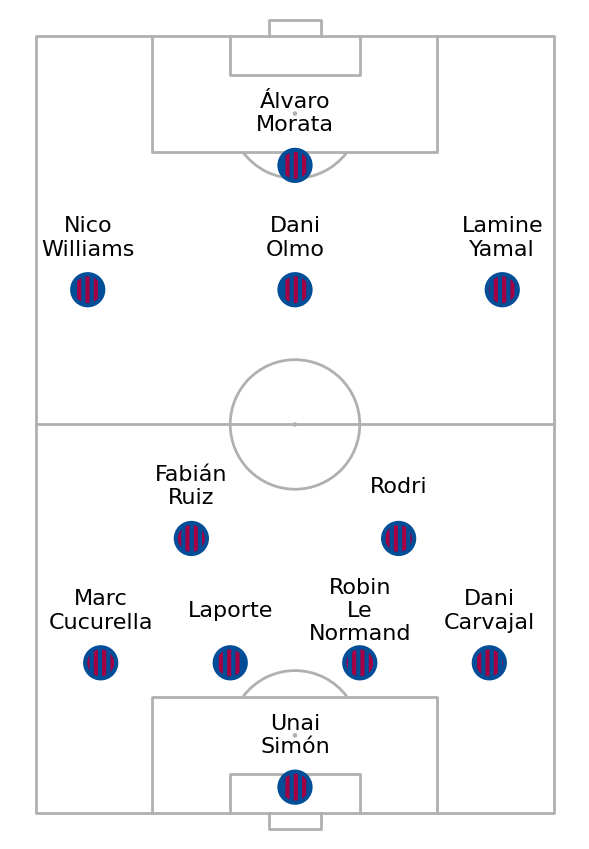

In [60]:
pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)
# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
mpl.rcParams['hatch.color'] = '#a50044'
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='#004d98', hatch='||', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

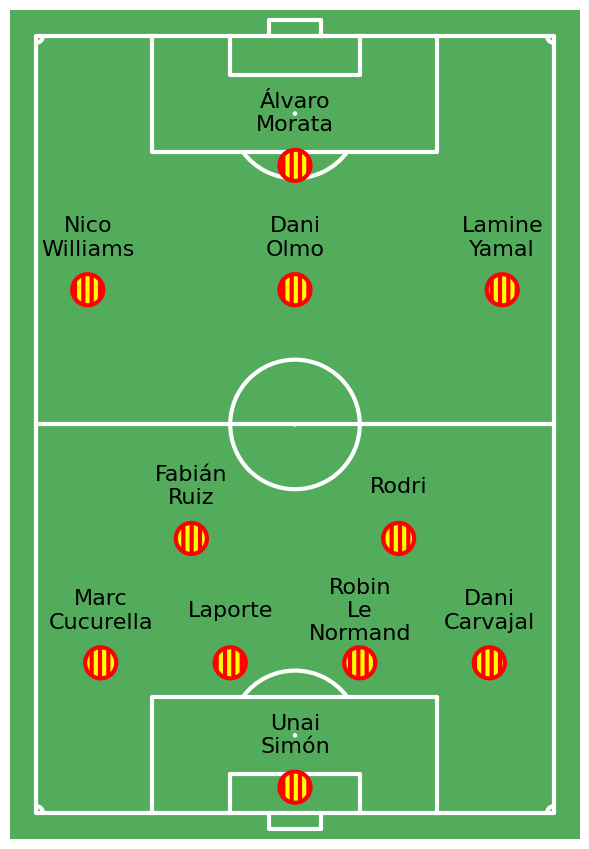

In [61]:
pitch = VerticalPitch(pitch_type='statsbomb', goal_type='box', pitch_color='#53ac5c',
                      line_color='white', linewidth=3, corner_arcs=True)
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)
# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
mpl.rcParams['hatch.color'] = 'yellow'
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='red', hatch='||', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

In [62]:
# Extract euro matches season 2024
Matches = sb.matches(competition_id = 55, season_id=282)
Matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2
5,3930180,2024-06-25,19:00:00.000,Europe - UEFA Euro,2024,Netherlands,Austria,2,3,available,...,2024-07-11T13:25:37.289456,3,Group Stage,Olympiastadion Berlin,Ivan Kružliak,Ronald Koeman,Ralf Rangnick,1.1.0,2,2
6,3930171,2024-06-20,19:00:00.000,Europe - UEFA Euro,2024,Denmark,England,1,1,available,...,2024-07-12T05:19:44.572914,2,Group Stage,Deutsche Bank Park,Artur Manuel Ribeiro Soares Dias,Kasper Hjulmand,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,...,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
8,3942226,2024-07-05,19:00:00.000,Europe - UEFA Euro,2024,Spain,Germany,2,1,available,...,2024-07-13T03:52:43.383929,5,Quarter-finals,MHPArena,Anthony Taylor,Luis de la Fuente Castillo,Julian Nagelsmann,1.1.0,2,2
9,3938645,2024-06-26,19:00:00.000,Europe - UEFA Euro,2024,Ukraine,Belgium,0,0,available,...,2024-07-11T16:17:18.090189,3,Group Stage,MHPArena,Anthony Taylor,Sergiy Rebrov,Domenico Tedesco,1.1.0,2,2


In [63]:
# Extract euro matches season 2024
Spain = Matches[(Matches['home_team'] == 'Spain') | (Matches['away_team'] == 'Spain')]
Spain

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
8,3942226,2024-07-05,19:00:00.000,Europe - UEFA Euro,2024,Spain,Germany,2,1,available,...,2024-07-13T03:52:43.383929,5,Quarter-finals,MHPArena,Anthony Taylor,Luis de la Fuente Castillo,Julian Nagelsmann,1.1.0,2,2
15,3941018,2024-06-30,22:00:00.000,Europe - UEFA Euro,2024,Spain,Georgia,4,1,available,...,2024-07-12T06:08:12.572176,4,Round of 16,RheinEnergieStadion,François Letexier,Luis de la Fuente Castillo,Willy Sagnol,1.1.0,2,2
18,3930179,2024-06-24,22:00:00.000,Europe - UEFA Euro,2024,Albania,Spain,0,1,available,...,2024-07-01T06:07:22.418137,3,Group Stage,Merkur Spiel-Arena,Glenn Nyberg,Sylvio Mendes Campos Junior,Luis de la Fuente Castillo,1.1.0,2,2
23,3930172,2024-06-20,22:00:00.000,Europe - UEFA Euro,2024,Spain,Italy,1,0,available,...,2024-07-12T00:16:51.275112,2,Group Stage,VELTINS-Arena,Slavko Vinčić,Luis de la Fuente Castillo,Luciano Spalletti,1.1.0,2,2
48,3930160,2024-06-15,19:00:00.000,Europe - UEFA Euro,2024,Spain,Croatia,3,0,available,...,2024-07-12T03:40:20.513429,1,Group Stage,Olympiastadion Berlin,Michael Oliver,Luis de la Fuente Castillo,Zlatko Dalić,1.1.0,2,2


In [64]:
match_files = Spain.iloc[:, 0].tolist()

# This will create a list of match IDs
print(match_files)

[3943043, 3942752, 3942226, 3941018, 3930179, 3930172, 3930160]
